In [1]:
import os

import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
event_id = "000001000"

In [6]:
hits = pd.read_csv(f"data/event{event_id}-hits.csv", header=0)
hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-64.4099,-7.163700,-1502.5,7,2,1
1,2,-55.3361,0.635342,-1502.5,7,2,1
2,3,-83.8305,-1.143010,-1502.5,7,2,1
3,4,-96.1091,-8.241030,-1502.5,7,2,1
4,5,-62.6736,-9.371200,-1502.5,7,2,1


In [7]:
cells = pd.read_csv(f"data/event{event_id}-cells.csv", header=0)
cells.head()

,hit_id,ch0,ch1,value
0,1,209,617,0.013832
1,1,210,617,0.079887
2,1,209,618,0.211723
3,2,68,446,0.334087
4,3,58,954,0.034005


In [8]:
particles = pd.read_csv(f"data/event{event_id}-particles.csv", header=0)
particles.head()

,particle_id,vx,vy,vz,px,py,pz,q,nhits
0,4503668346847232,-0.009288,0.009861,-0.077879,-0.055269,0.323272,-0.203492,-1,8
1,4503737066323968,-0.009288,0.009861,-0.077879,-0.948125,0.470892,2.010060,1,11
2,4503805785800704,-0.009288,0.009861,-0.077879,-0.886484,0.105749,0.683881,-1,0
3,4503874505277440,-0.009288,0.009861,-0.077879,0.257539,-0.676718,0.991616,1,12
4,4503943224754176,-0.009288,0.009861,-0.077879,16.439400,-15.548900,-39.824900,1,3


In [9]:
truth = pd.read_csv(f"data/event{event_id}-truth.csv", header=0)
truth.head()

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1,0,-64.4116,-7.164120,-1502.5,250710.000000,-149908.000000,-956385.00000,0.000000
1,2,22525763437723648,-55.3385,0.630805,-1502.5,-0.570605,0.028390,-15.49220,0.000010
2,3,0,-83.8280,-1.145580,-1502.5,626295.000000,-169767.000000,-760877.00000,0.000000
3,4,297237712845406208,-96.1229,-8.230360,-1502.5,-0.225235,-0.050968,-3.70232,0.000008
4,5,418835796137607168,-62.6594,-9.375040,-1502.5,-0.281806,-0.023487,-6.57318,0.000009


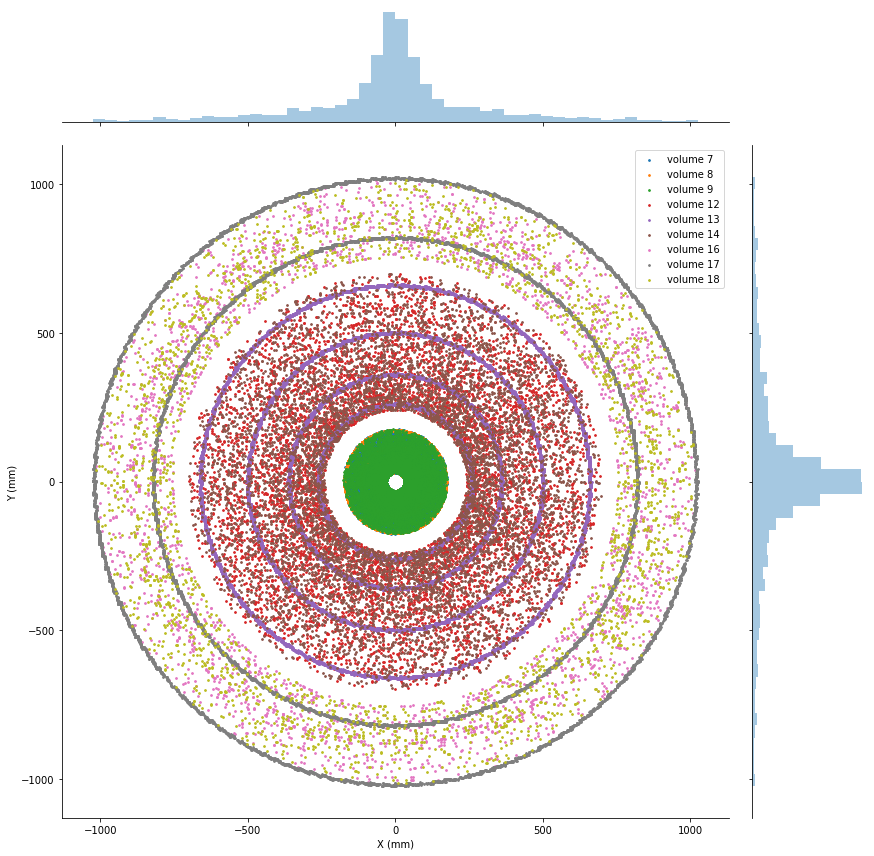

In [11]:
g = sns.jointplot(hits.x, hits.y,  s=1, height=12)
g.ax_joint.cla()
plt.sca(g.ax_joint)

volumes = hits.volume_id.unique()
for volume in volumes:
    v = hits[hits.volume_id == volume]
    plt.scatter(v.x, v.y, s=3, label='volume {}'.format(volume))

plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.legend()
plt.show()

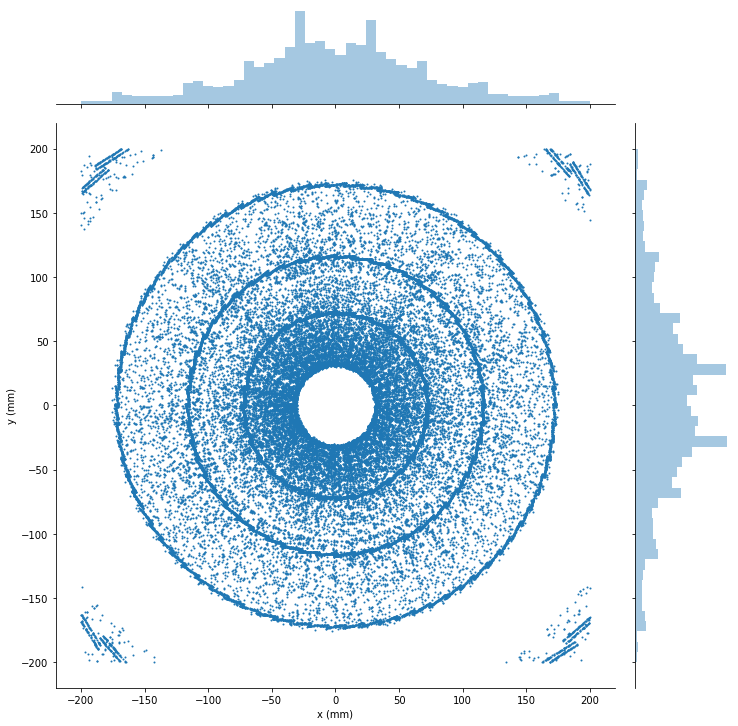

In [34]:
radialview = sns.jointplot( *(hits[(hits.x.abs()<200) & (hits.y.abs()<200)].loc[:, ["x", "y"]].values.T), height=10, s=1)
radialview.set_axis_labels('x (mm)', 'y (mm)')
plt.show()

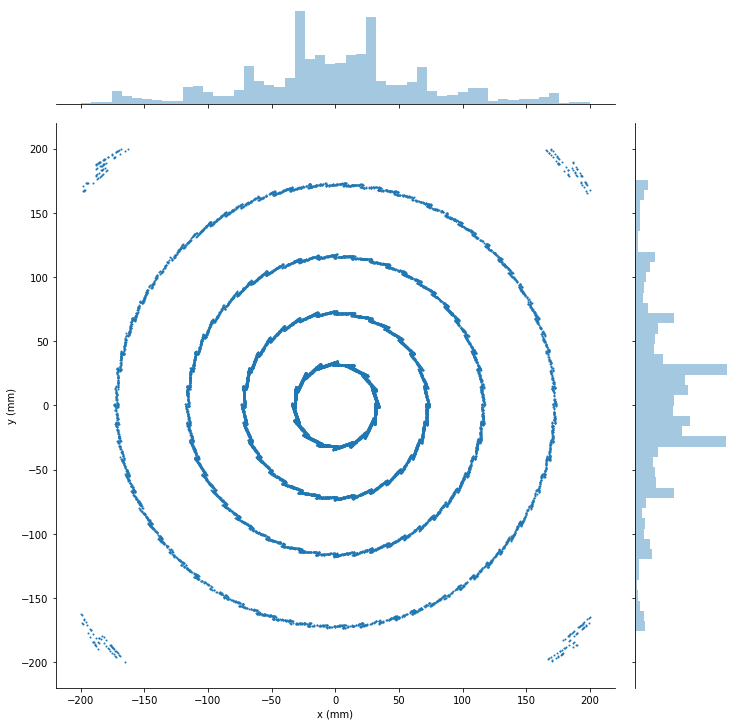

In [35]:
nocap = hits[hits.z.abs()<200]
radialview = sns.jointplot( *(nocap[(nocap.x.abs()<200) & (nocap.y.abs()<200)].loc[:, ["x", "y"]].values.T), height=10, s=1)
radialview.set_axis_labels('x (mm)', 'y (mm)')
plt.show()

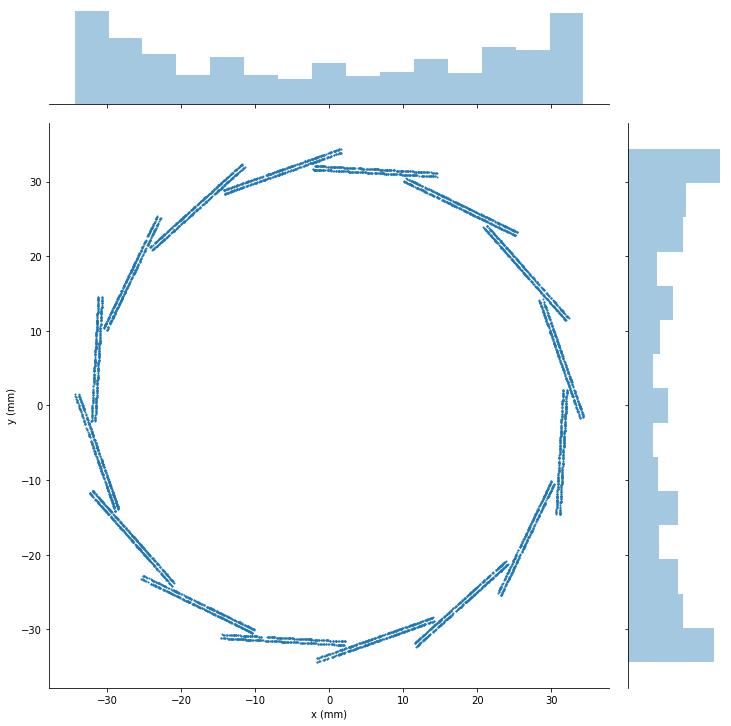

In [36]:
radialview = sns.jointplot( *(nocap[(nocap.x.abs()<50) & (nocap.y.abs()<50)].loc[:, ["x", "y"]].values.T), height=10, s=1)
radialview.set_axis_labels('x (mm)', 'y (mm)')
plt.show()

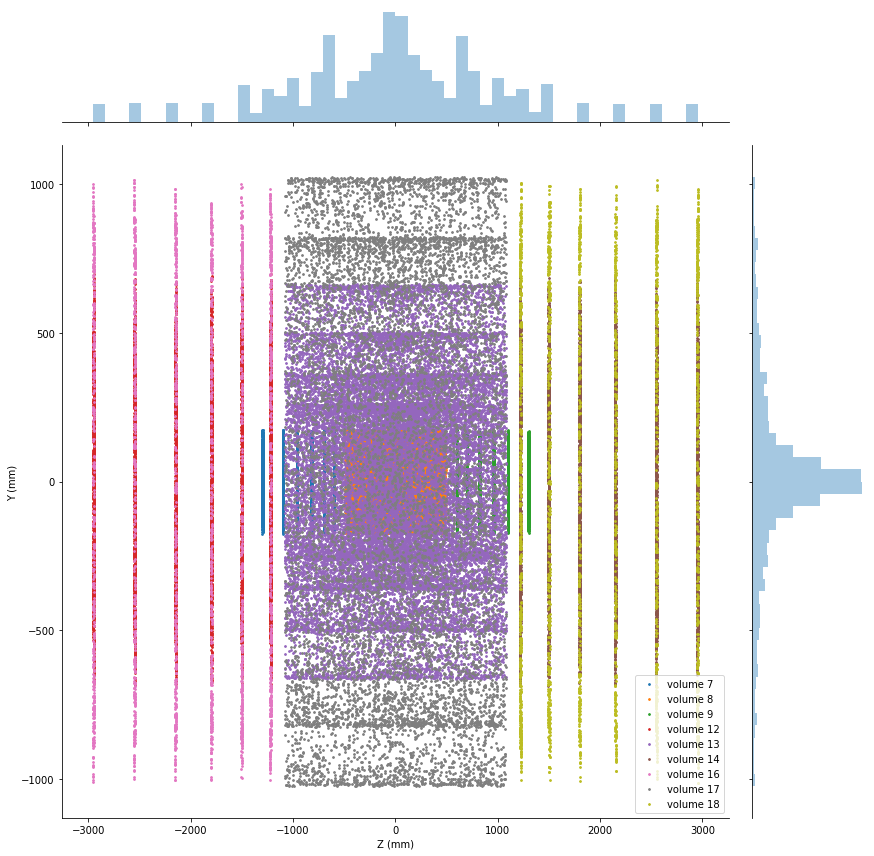

In [37]:
g = sns.jointplot(hits.z, hits.y, s=1, size=12)
g.ax_joint.cla()
plt.sca(g.ax_joint)

volumes = hits.volume_id.unique()
for volume in volumes:
    v = hits[hits.volume_id == volume]
    plt.scatter(v.z, v.y, s=3, label='volume {}'.format(volume))

plt.xlabel('Z (mm)')
plt.ylabel('Y (mm)')
plt.legend()
plt.show()

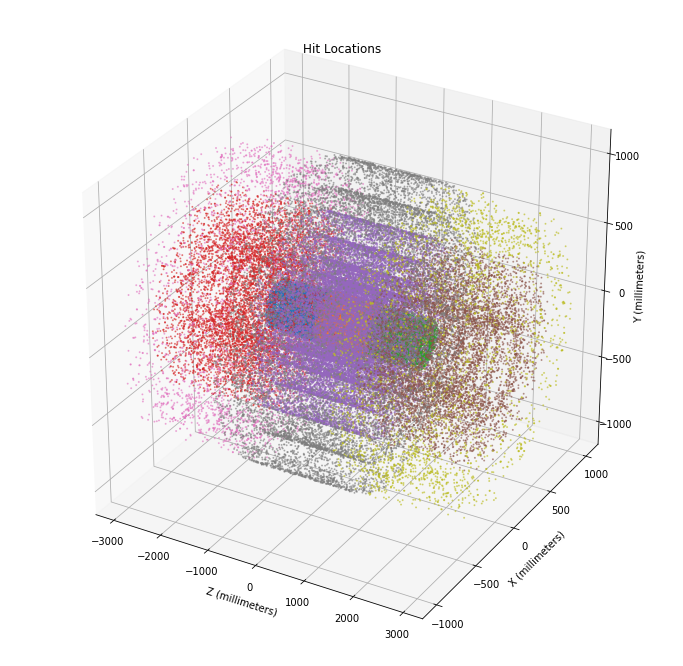

In [38]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
for volume in volumes:
    v = hits[hits.volume_id == volume]
    ax.scatter(v.z, v.x, v.y, s=1, label='volume {}'.format(volume), alpha=0.5)
ax.set_title('Hit Locations')
ax.set_xlabel('Z (millimeters)')
ax.set_ylabel('X (millimeters)')
ax.set_zlabel('Y (millimeters)')
plt.show()

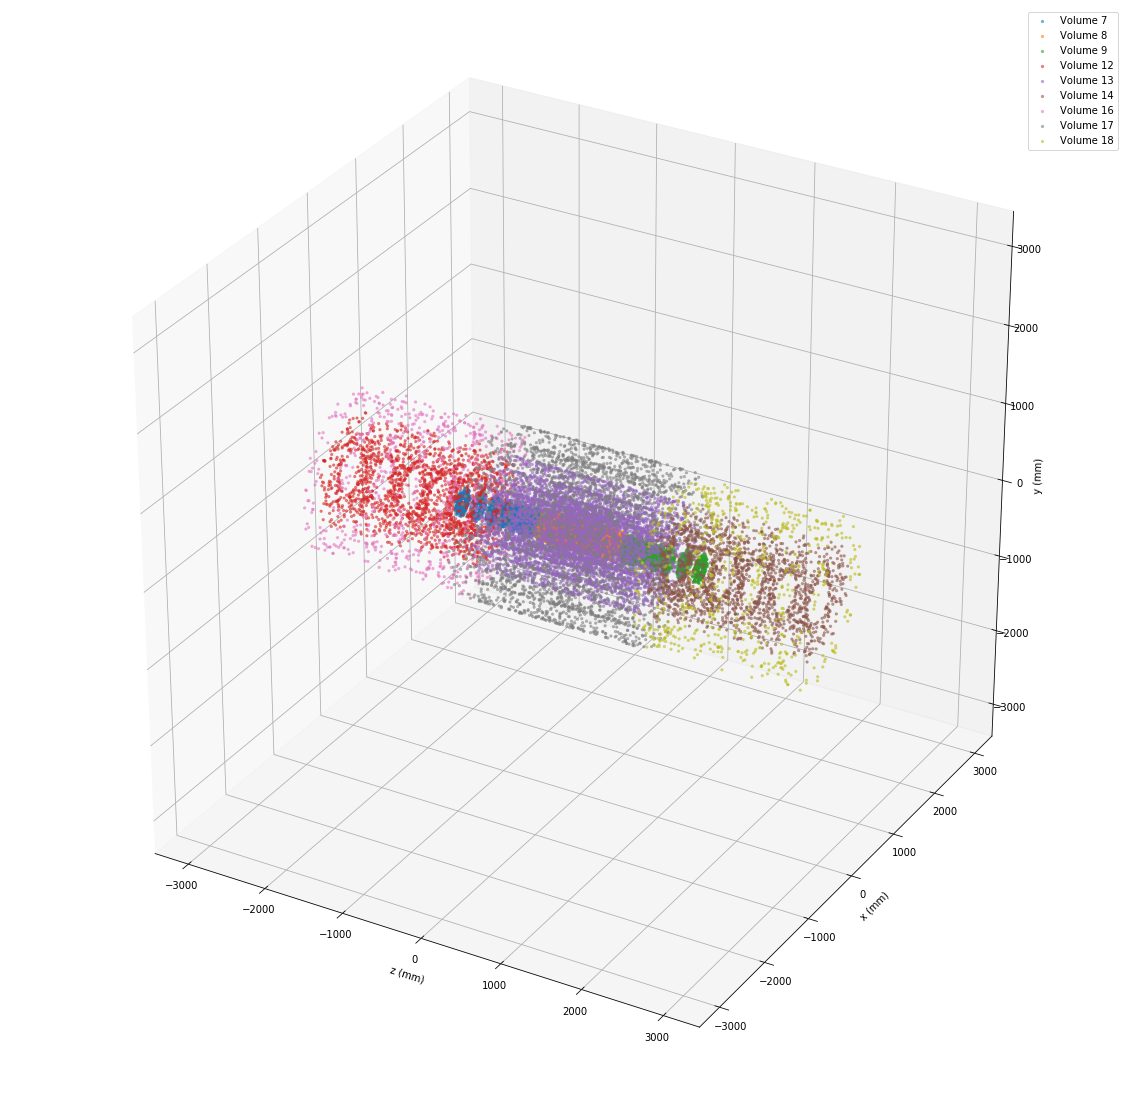

In [40]:
sample = hits.sample(30000)
plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')
for volume in volumes:
    v = sample[sample.volume_id == volume]
    ax.scatter(v.z, v.x, v.y, s=5, label='Volume '+str(volume), alpha=0.5)
ax.set_xlabel('z (mm)')
ax.set_ylabel('x (mm)')
ax.set_zlabel('y (mm)')
ax.legend()
# These two added to widen the 3D space
ax.scatter(3000,3000,3000, s=0)
ax.scatter(-3000,-3000,-3000, s=0)
plt.show()

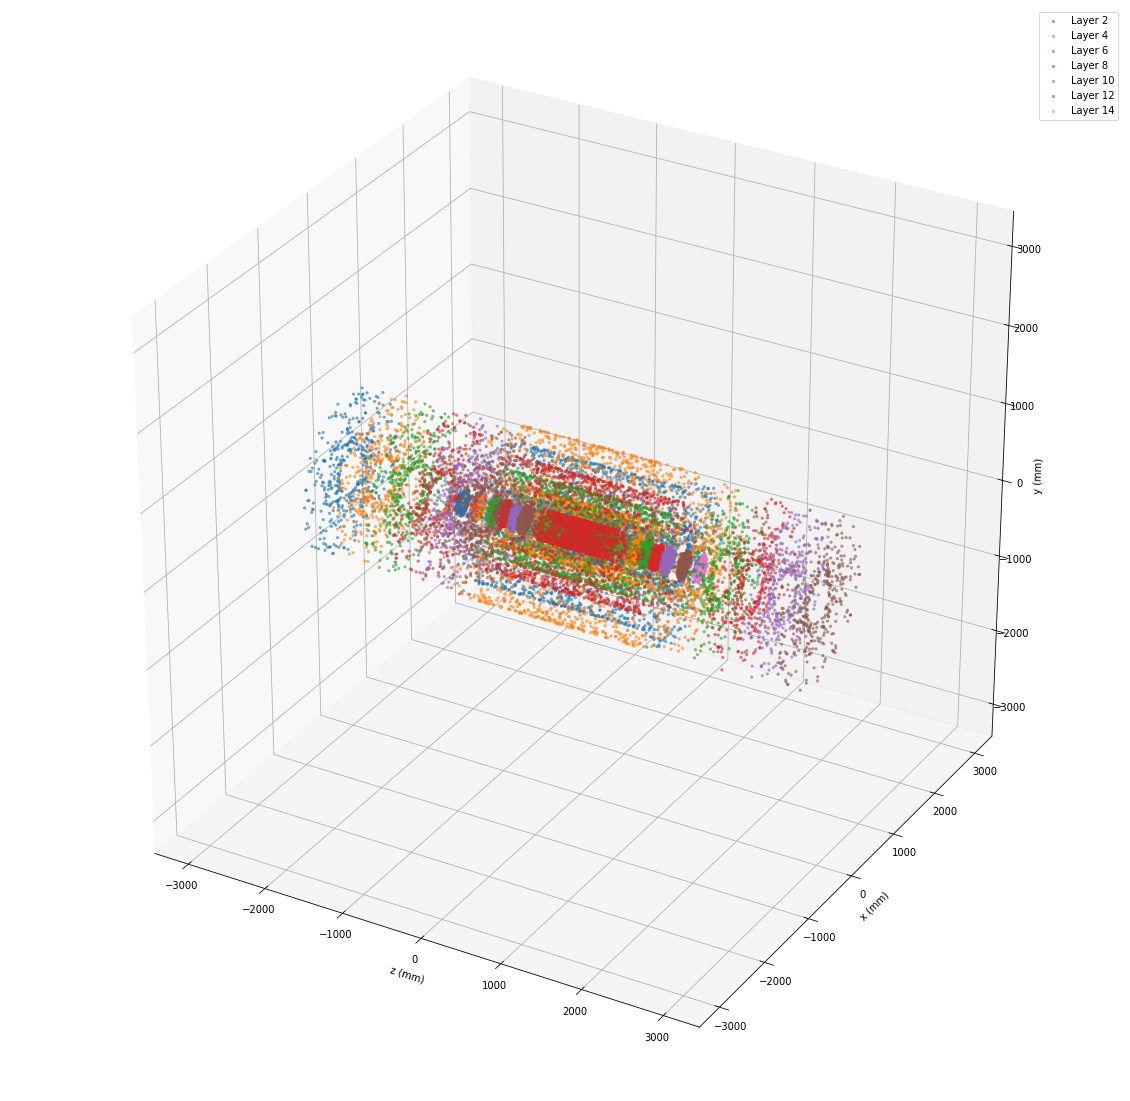

In [42]:
layers = hits.layer_id.unique()
plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')
for layer in layers:
    l = sample[sample.layer_id == layer]
    ax.scatter(l.z, l.x, l.y, s=5, label='Layer '+str(layer), alpha=0.5)
ax.set_xlabel('z (mm)')
ax.set_ylabel('x (mm)')
ax.set_zlabel('y (mm)')
ax.legend()
# These two added to widen the 3D space
ax.scatter(3000,3000,3000, s=0)
ax.scatter(-3000,-3000,-3000, s=0)
plt.show()

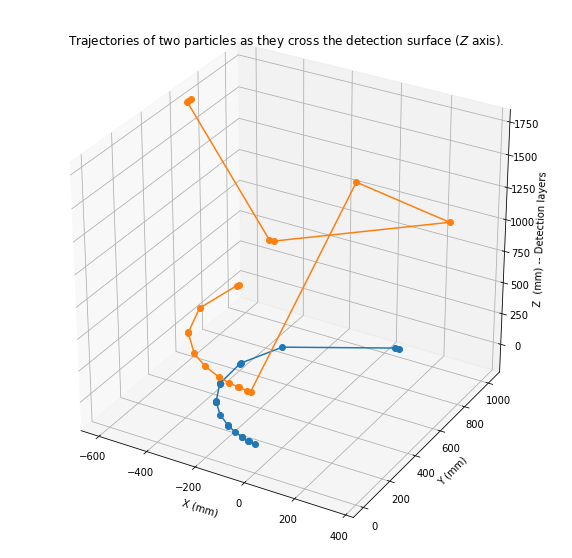

In [44]:
# Get particle id with max number of hits in this event
particle = particles.loc[particles.nhits == particles.nhits.max()].iloc[0]
particle2 = particles.loc[particles.nhits == particles.nhits.max()].iloc[1]

# Get points where the same particle intersected subsequent layers of the observation material
p_traj_surface = truth[truth.particle_id == particle.particle_id][['tx', 'ty', 'tz']]
p_traj_surface2 = truth[truth.particle_id == particle2.particle_id][['tx', 'ty', 'tz']]

p_traj = (p_traj_surface
          .append({'tx': particle.vx, 'ty': particle.vy, 'tz': particle.vz}, ignore_index=True)
          .sort_values(by='tz'))
p_traj2 = (p_traj_surface2
          .append({'tx': particle2.vx, 'ty': particle2.vy, 'tz': particle2.vz}, ignore_index=True)
          .sort_values(by='tz'))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot(
    xs=p_traj.tx,
    ys=p_traj.ty,
    zs=p_traj.tz, marker='o')
ax.plot(
    xs=p_traj2.tx,
    ys=p_traj2.ty,
    zs=p_traj2.tz, marker='o')

ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.set_zlabel('Z  (mm) -- Detection layers')
plt.title('Trajectories of two particles as they cross the detection surface ($Z$ axis).')
plt.show()